## Drifter Velocity Period Notebook

### Introduction
This notebook focuses on the computation of the oscillation period of drifters' velocity

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 221

## Import Library

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation

## Read Drifter Data

In [2]:
fn='./drifter_6hour_qc_893c_d15d_c4b7_U1711967648742.nc';
ds=xr.open_dataset(fn);
ds

<xarray.Dataset>
Dimensions:    (row: 78383)
Dimensions without coordinates: row
Data variables:
    time       (row) datetime64[ns] ...
    latitude   (row) float64 ...
    longitude  (row) float64 ...
    sst        (row) float64 ...
    ve         (row) float64 ...
    vn         (row) float64 ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-10-14T18:00:00Z
    time_coverage_start:        2023-01-01T00:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -70.0
    wmo_platform_code:          4600620

## Extract Coordinates and Variables

In [3]:
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values

## Creation of Pandas Array for Drifter Data

In [4]:
data = {
    'longitude': lon,
    'latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr,
    'sst'      : sst
}

df = pd.DataFrame(data)
df

,longitude,latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
78378,-22.006,-19.946,2023-06-11 12:00:00,-0.03853,-0.05076,25.189
78379,-22.013,-19.961,2023-06-11 18:00:00,-0.05150,-0.06262,25.179
78380,-22.027,-19.971,2023-06-12 00:00:00,-0.06030,-0.04773,25.133
78381,-22.038,-19.980,2023-06-12 06:00:00,-0.06036,-0.05688,25.093


## Selecting Drifter Data

In [5]:
# Test: Our selected drifter has 1102 observations. 
df_1 = df[16129:16290]
df_1

,longitude,latitude,time,ve,vn,sst
16129,-1.824,2.193,2023-01-01 00:00:00,-0.20141,0.03785,29.958
16130,-1.859,2.201,2023-01-01 06:00:00,-0.19177,-0.00909,29.682
16131,-1.898,2.190,2023-01-01 12:00:00,-0.22554,-0.05266,29.991
16132,-1.946,2.180,2023-01-01 18:00:00,-0.18678,-0.05015,29.888
16133,-1.971,2.170,2023-01-02 00:00:00,-0.16427,0.00519,29.645
...,...,...,...,...,...,...
16285,-2.393,1.452,2023-02-09 00:00:00,-0.05208,-0.00764,29.370
16286,-2.407,1.443,2023-02-09 06:00:00,-0.09199,-0.01783,29.316
16287,-2.429,1.445,2023-02-09 12:00:00,-0.10036,-0.00318,29.521
16288,-2.446,1.442,2023-02-09 18:00:00,-0.09536,0.02611,29.550


## Let's plot the trajectory of our drifter



C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_10824\151020337.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()


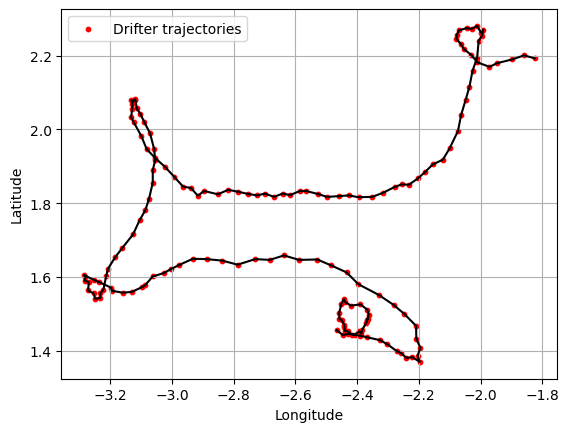

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with longitude, latitude, temperature, and time
# Replace this with your actual DataFrame
df_1 = df[16129:16290]

# Convertir la colonne temps en un format numérique représentant le temps écoulé (en secondes)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Tracer la force inertielle en 2D
plt.scatter(df_1['longitude'], df_1['latitude'], color='r', s=10)
plt.plot(df_1['longitude'], df_1['latitude'], color='k', linestyle='-')
 
# plt.colorbar(label='Eastward velocity [m/s]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title('Eastward velocity Distribution')
# Add grid
plt.grid(True)
plt.legend(['Drifter trajectories'])
plt.savefig("fig15 mode.png")
plt.show()

## Time Series of Eastward (ve) and Northward (vn) Velocity for Our Drifter 

## Case of ve

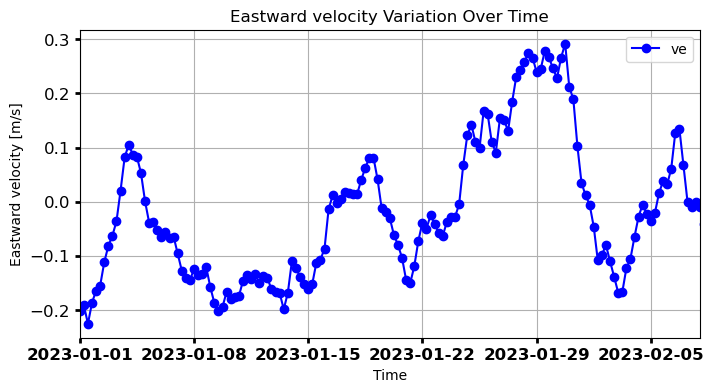

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'time' and 've' columns
df_1 = df[16129:16290]
# Step 1: Plotting
plt.figure(figsize=(8, 4))

# Plot ve as a function of time
plt.plot(df_1['time'], df_1['ve'], color='b', marker='o', linestyle='-')

# Add axis labels and title
plt.legend(['ve'])
plt.xlabel('Time')
plt.ylabel('Eastward velocity [m/s]')
plt.title('Eastward velocity Variation Over Time')

# Add grid
plt.grid(True)

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-02-08'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H').strftime('%Y-%m-%d'), rotation=0)

# plt.fill_between([start_date, end_date], ymin, ymax, color='green', alpha=0.3)
# plt.savefig("fig mode.png")
plt.show()

## Case of vn

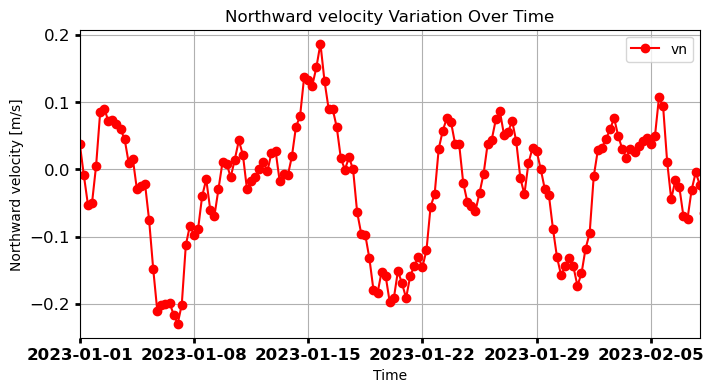

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'time' and 've' columns
df_1 = df[16129:16290]
# Step 1: Plotting
plt.figure(figsize=(8, 4))

# Plot ve as a function of time
plt.plot(df_1['time'], df_1['vn'], color='red', marker='o', linestyle='-')

# Add axis labels and title
plt.legend(['vn'])
plt.xlabel('Time')
plt.ylabel('Northward velocity [m/s]')
plt.title('Northward velocity Variation Over Time')

# Add grid
plt.grid(True)

# Set font size and font weight directly on the Axes object
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=12, width=2)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Set x-axis limits and tick labels
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-02-08'))
ax.set_xticks(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H'))
ax.set_xticklabels(pd.date_range(start='2023-01-01', end='2023-02-08', freq='168H').strftime('%Y-%m-%d'), rotation=0)

# plt.fill_between([start_date, end_date], ymin, ymax, color='green', alpha=0.3)
# plt.savefig("fig22 mode.png")
plt.show()

## Conclusion

- By observing the time series of $v_e$ and $v_n$, we notice that $v_e$ undergoes an oscillation in 16 hours and $v_n$ undergoes an oscillation in 3.75 days, which corresponds to a period of $16$ hours for $v_e$ and a period of $90$ hours for $v_n$.
- Knowing that frequency is equal to the inverse of the period, the frequency for $v_n$ is $3.086 \times 10^{-6}$ and for $v_e$ is $1.736 \times 10^{-5}$.

## We will detrend time series using mirror effect at the boundaries

## Case of ve

In [12]:
# Making them periodic at the boundaries.
# Convert your numpy array into pandas DataFrame if not already done
df_1 = df[16129:16290]

# Step 1: Trend Detection
df_1['trend'] = df_1['ve'].rolling(window=12).mean()

# Step 2: Removing Seasonal Components
df_1['detrended'] = df_1['ve'] - df_1['trend']

# Step 3: Applying Mirror Effect at Boundaries
# Duplicate data by reversing time
df_1_mirror = df_1.copy()
df_1_mirror['time'] = df_1_mirror['time'].apply(lambda x: x - (x - df_1['time'].min()) * 2)

# Concatenate original DataFrame and its mirror
df_1_extended = pd.concat([df_1, df_1_mirror], ignore_index=True)

# Sort by time
df_1_extended.sort_values(by='time', inplace=True)

# Step 4: Interpolation or Extrapolation (not implemented here)

# Step 5: Validation (not implemented here)

# Displaying extended data with mirror effect
print(df_1_extended)

     longitude  latitude                time       ve       vn     sst  \
321     -2.466     1.455 2022-11-22 00:00:00 -0.06792  0.03639  29.419   
320     -2.446     1.442 2022-11-22 06:00:00 -0.09536  0.02611  29.550   
319     -2.429     1.445 2022-11-22 12:00:00 -0.10036 -0.00318  29.521   
318     -2.407     1.443 2022-11-22 18:00:00 -0.09199 -0.01783  29.316   
317     -2.393     1.452 2022-11-23 00:00:00 -0.05208 -0.00764  29.370   
..         ...       ...                 ...      ...      ...     ...   
156     -2.393     1.452 2023-02-09 00:00:00 -0.05208 -0.00764  29.370   
157     -2.407     1.443 2023-02-09 06:00:00 -0.09199 -0.01783  29.316   
158     -2.429     1.445 2023-02-09 12:00:00 -0.10036 -0.00318  29.521   
159     -2.446     1.442 2023-02-09 18:00:00 -0.09536  0.02611  29.550   
160     -2.466     1.455 2023-02-10 00:00:00 -0.06792  0.03639  29.419   

        trend  detrended  
321 -0.044655  -0.023265  
320 -0.033330  -0.062030  
319 -0.014147  -0.086213  
318

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\335655196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['trend'] = df_1['ve'].rolling(window=12).mean()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\335655196.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['detrended'] = df_1['ve'] - df_1['trend']


## Case of vn

In [13]:
# Making them periodic at the boundaries.
# Convert your numpy array into pandas DataFrame if not already done
df_2 = df[16129:16290]

# Step 1: Trend Detection
df_2['trend'] = df_2['vn'].rolling(window=12).mean()

# Step 2: Removing Seasonal Components
df_2['detrended'] = df_2['vn'] - df_2['trend']

# Step 3: Applying Mirror Effect at Boundaries
# Duplicate data by reversing time
df_2_mirror = df_2.copy()
df_2_mirror['time'] = df_2_mirror['time'].apply(lambda x: x - (x - df_2['time'].min()) * 2)

# Concatenate original DataFrame and its mirror
df_2_extended = pd.concat([df_2, df_2_mirror], ignore_index=True)

# Sort by time
df_2_extended.sort_values(by='time', inplace=True)

# Step 4: Interpolation or Extrapolation (not implemented here)

# Step 5: Validation (not implemented here)

# Displaying extended data with mirror effect
print(df_2_extended)

     longitude  latitude                time       ve       vn     sst  \
321     -2.466     1.455 2022-11-22 00:00:00 -0.06792  0.03639  29.419   
320     -2.446     1.442 2022-11-22 06:00:00 -0.09536  0.02611  29.550   
319     -2.429     1.445 2022-11-22 12:00:00 -0.10036 -0.00318  29.521   
318     -2.407     1.443 2022-11-22 18:00:00 -0.09199 -0.01783  29.316   
317     -2.393     1.452 2022-11-23 00:00:00 -0.05208 -0.00764  29.370   
..         ...       ...                 ...      ...      ...     ...   
156     -2.393     1.452 2023-02-09 00:00:00 -0.05208 -0.00764  29.370   
157     -2.407     1.443 2023-02-09 06:00:00 -0.09199 -0.01783  29.316   
158     -2.429     1.445 2023-02-09 12:00:00 -0.10036 -0.00318  29.521   
159     -2.446     1.442 2023-02-09 18:00:00 -0.09536  0.02611  29.550   
160     -2.466     1.455 2023-02-10 00:00:00 -0.06792  0.03639  29.419   

        trend  detrended  
321 -0.020687   0.057077  
320 -0.029566   0.055676  
319 -0.033996   0.030816  
318

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\3632686416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['trend'] = df_2['vn'].rolling(window=12).mean()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\3632686416.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['detrended'] = df_2['vn'] - df_2['trend']


## Calculation of the period and visualization of the frequency spectrum

## Vase of ve

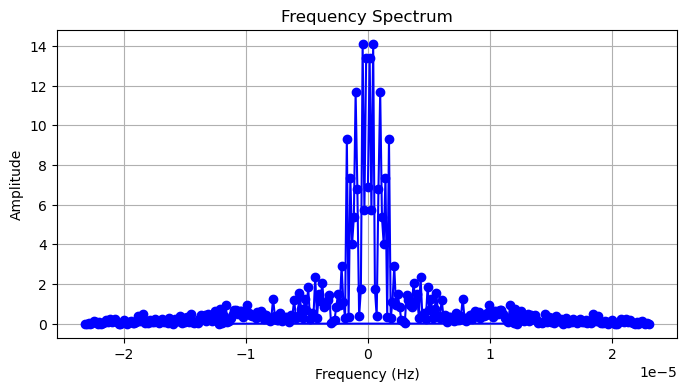

Period of the time series: 2318400.00 time units


In [14]:
# Suppose 'df_extended' is your DataFrame containing the extended time series data with mirror effect
# 'time' is the column representing time and 've' is the column representing velocities

# Calculating the Fourier transform
N = len(df_1_extended)
dt = (df_1_extended['time'].iloc[1] - df_1_extended['time'].iloc[0]).total_seconds()  # Convert to seconds
velocity_fft = np.fft.fft(df_1_extended['ve'])
freq = np.fft.fftfreq(N, dt)  # Corresponding frequencies

# Identifying the dominant frequency (which corresponds to the period)
index_max = np.argmax(np.abs(velocity_fft))

# Checking if the dominant frequency is not zero
if freq[index_max] != 0:
    period = 1 / np.abs(freq[index_max])
else:
    period = np.inf  # If the dominant frequency is zero, consider the period as infinite

# Displaying the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(freq, np.abs(velocity_fft), color='blue', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.savefig("fig17 mode.png")
plt.show()

print("Period of the time series: {:.2f} time units".format(period))

### Let's display the frequency spectrum on a logarithmic scale.

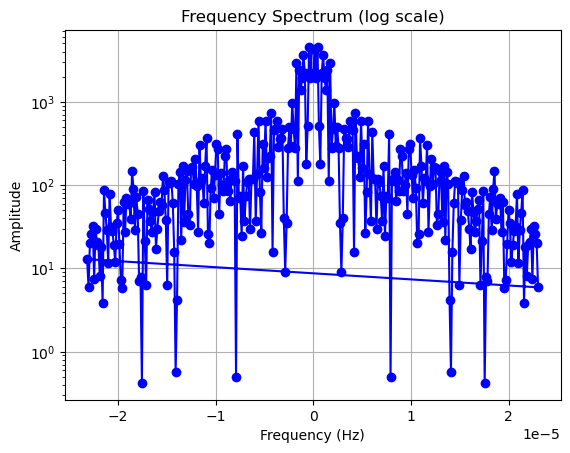

Period of the time series: 2318400.00 time units


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Signal Parameters
N = len(df_1_extended)  # Number of samples
dt = (df_1_extended['time'].iloc[1] - df_1_extended['time'].iloc[0]).total_seconds()  # Time interval between samples

# Time
t = np.linspace(0.0, N*dt, N)

# Creating the signal with positive and negative frequencies
frequencies = np.fft.fftfreq(N, dt)  # Frequencies in Hz (positive and negative)
amplitudes = np.fft.fft(df_1_extended['ve'])  # Corresponding amplitudes

y = np.zeros(N, dtype=complex)  # Defining y as an array of complex numbers
for freq, amp in zip(frequencies, amplitudes):
    y += amp * np.exp(1j * 2 * np.pi * freq * t)  # Using np.exp to create complex numbers

# Calculating the Fourier transform and frequencies
Y = np.fft.fft(y)
freq = np.fft.fftfreq(N, dt)

# Identifying the dominant frequency (which corresponds to the period)
index_max = np.argmax(np.abs(Y))

# Checking if the dominant frequency is not zero
if freq[index_max] != 0:
    period = 1 / np.abs(freq[index_max])
else:
    period = np.inf  # If the dominant frequency is zero, consider the period as infinite

# Plotting the frequency spectrum on a log scale
plt.plot(freq, np.abs(Y), color='blue', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (log scale)')
plt.grid()
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.show()
print("Period of the time series: {:.2f} time units".format(period))

### Interpretation
   - The line observed in our frequency spectrum is due to the way the data is arranged when using NumPy's fft function. Indeed, the result of np.fft.fft returns the FFT frequencies in such a way that negative frequencies are on the left and positive frequencies on the right. This creates this appearance of a line connecting the first and last values.

   - To obtain a frequency spectrum without this "line", we divide the spectrum into two parts, one for positive frequencies and the other for negative frequencies, and then plot them separately. In the following cells, we will try to correct this:

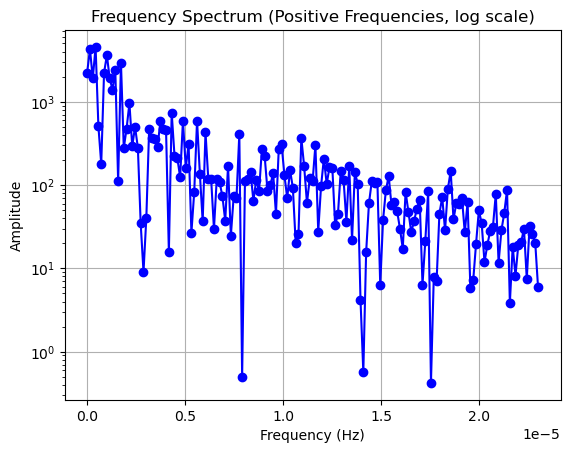

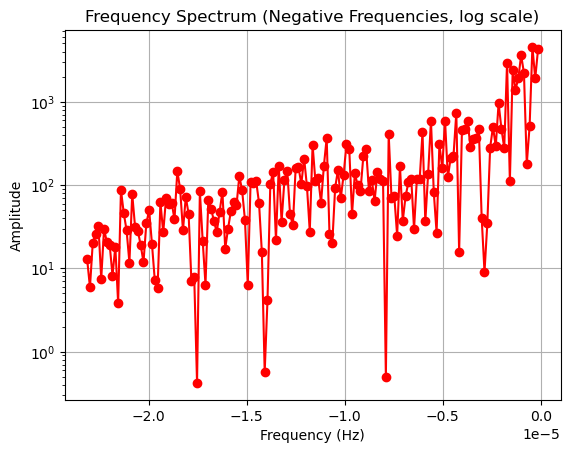

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Signal Parameters
N = len(df_1_extended)  # Number of samples
dt = (df_1_extended['time'].iloc[1] - df_1_extended['time'].iloc[0]).total_seconds()  # Time interval between samples

# Time
t = np.linspace(0.0, N*dt, N)

# Creating the signal with positive and negative frequencies
frequencies = np.fft.fftfreq(N, dt)  # Frequencies in Hz (positive and negative)
amplitudes = np.fft.fft(df_1_extended['ve'])  # Corresponding amplitudes
y = np.zeros(N, dtype=complex)  # Defining y as an array of complex numbers
for freq, amp in zip(frequencies, amplitudes):
    y += amp * np.exp(1j * 2 * np.pi * freq * t)  # Using np.exp to create complex numbers

# Calculating the Fourier transform and frequencies
Y = np.fft.fft(y)
freq = np.fft.fftfreq(N, dt)

# Separating positive and negative frequencies
half_N = N // 2
positive_freq = freq[:half_N]
positive_Y = Y[:half_N]
negative_freq = freq[half_N:]
negative_Y = Y[half_N:]

# Plotting the frequency spectrum on a log scale for positive frequencies
plt.plot(positive_freq, np.abs(positive_Y), color='blue', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (Positive Frequencies, log scale)')
plt.grid()
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.show()

# Plotting the frequency spectrum on a log scale for negative frequencies
plt.plot(negative_freq, np.abs(negative_Y), color='red', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (Negative Frequencies, log scale)')
plt.grid()
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.show()

## Case of vn

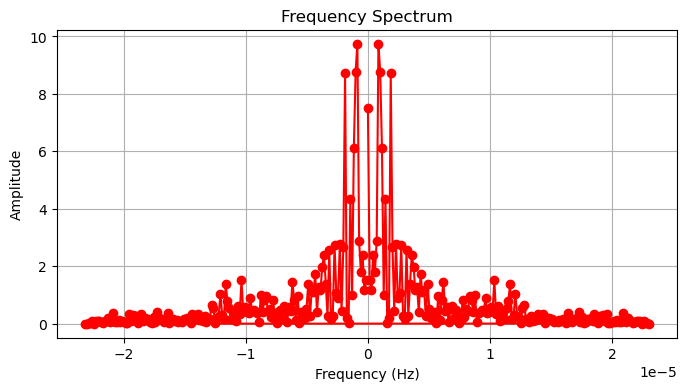

Period of the time series: 1159200.00 time units


In [17]:
# Calculating the Fourier transform
N = len(df_2_extended)
dt = (df_2_extended['time'].iloc[1] - df_2_extended['time'].iloc[0]).total_seconds()  # Convert to seconds
velocity_fft = np.fft.fft(df_2_extended['vn'])
freq = np.fft.fftfreq(N, dt)  # Corresponding frequencies

# Identifying the dominant frequency (which corresponds to the period)
index_max = np.argmax(np.abs(velocity_fft))

# Checking if the dominant frequency is not zero
if freq[index_max] != 0:
    period = 1 / np.abs(freq[index_max])
else:
    period = np.inf  # If the dominant frequency is zero, consider the period as infinite

# Displaying the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(freq, np.abs(velocity_fft), color='red', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
# plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.savefig("fig18 mode.png")
plt.show()

print("Period of the time series: {:.2f} time units".format(period))

### Let's display the frequency spectrum on a logarithmic scale 

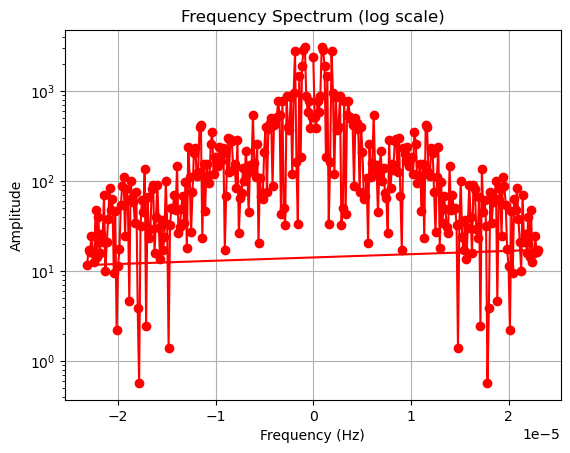

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Signal Parameters
N = len(df_2_extended)  # Number of samples
dt = (df_2_extended['time'].iloc[1] - df_2_extended['time'].iloc[0]).total_seconds()  # Time interval between samples

# Time
t = np.linspace(0.0, N*dt, N)

# Creating the signal with positive and negative frequencies
frequencies = np.fft.fftfreq(N, dt)  # Frequencies in Hz (positive and negative)
amplitudes = np.fft.fft(df_2_extended['vn'])  # Corresponding amplitudes

y = np.zeros(N, dtype=complex)  # Defining y as an array of complex numbers
for freq, amp in zip(frequencies, amplitudes):
    y += amp * np.exp(1j * 2 * np.pi * freq * t)  # Using np.exp to create complex numbers

# Calculating the Fourier transform and frequencies
Y = np.fft.fft(y)
freq = np.fft.fftfreq(N, dt)

# Plotting the frequency spectrum on a log scale
plt.plot(freq, np.abs(Y), color='red', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (log scale)')
plt.grid()
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.show()

### Let's display the frequency spectrum on a logarithmic scale in two parts.

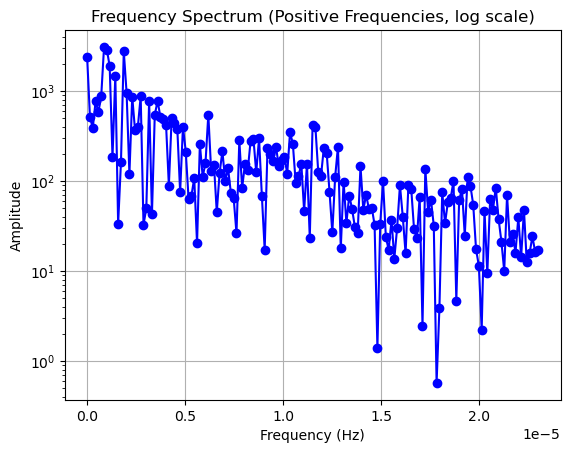

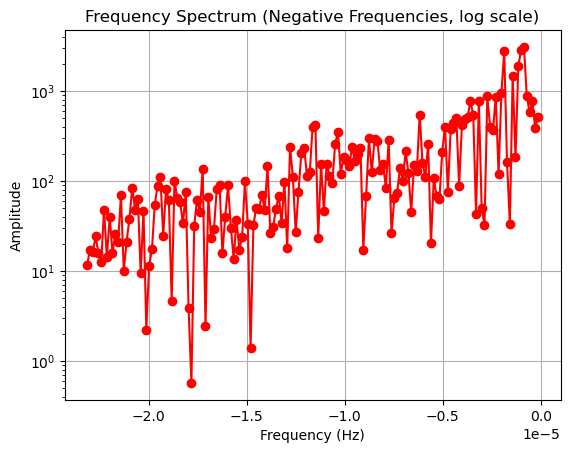

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Signal Parameters
N = len(df_2_extended)  # Number of samples
dt = (df_2_extended['time'].iloc[1] - df_2_extended['time'].iloc[0]).total_seconds()  # Time interval between samples

# Time
t = np.linspace(0.0, N*dt, N)

# Creating the signal with positive and negative frequencies
frequencies = np.fft.fftfreq(N, dt)  # Frequencies in Hz (positive and negative)
amplitudes = np.fft.fft(df_2_extended['vn'])  # Corresponding amplitudes
y = np.zeros(N, dtype=complex)  # Defining y as an array of complex numbers
for freq, amp in zip(frequencies, amplitudes):
    y += amp * np.exp(1j * 2 * np.pi * freq * t)  # Using np.exp to create complex numbers

# Calculating the Fourier transform and frequencies
Y = np.fft.fft(y)
freq = np.fft.fftfreq(N, dt)

# Separating positive and negative frequencies
half_N = N // 2
positive_freq = freq[:half_N]
positive_Y = Y[:half_N]
negative_freq = freq[half_N:]
negative_Y = Y[half_N:]

# Plotting the frequency spectrum on a log scale for positive frequencies
plt.plot(positive_freq, np.abs(positive_Y), color='blue', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (Positive Frequencies, log scale)')
plt.grid()
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.show()

# Plotting the frequency spectrum on a log scale for negative frequencies
plt.plot(negative_freq, np.abs(negative_Y), color='red', marker='o', linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum (Negative Frequencies, log scale)')
plt.grid()
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.show()

## Conclusion

- By applying the mirror effect, we obtain a frequency of $4.313 \times 10^{-7}$ for $v_e$ and $8.627 \times 10^{-7}$ for $v_n$.

## Comparison between Analytically Obtained Frequencies and those Obtained by Mirror Effect

- Comparing the frequencies of the two velocities, we observe that the frequencies of $v_n$ obtained analytically are very close to those obtained by the mirror effect, the same for $v_e$, within a few centimeters.
- $v_e$ and $v_n$ have respective orders of magnitude of $10^{-5}$ and $10^{-6}$, which correspond to orders of magnitude of the Coriolis force. This consequently proves that the oscillations of $v_e$ as for $v_n$ are inertial.
- In the following cells, we will attempt to highlight the inertial forces resulting from $ve$ and $vn$. 

#  Case of ve

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\496911052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\496911052.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['acceleration'] = df_1['ve'].diff() / df_1['time'].diff()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\496911052.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

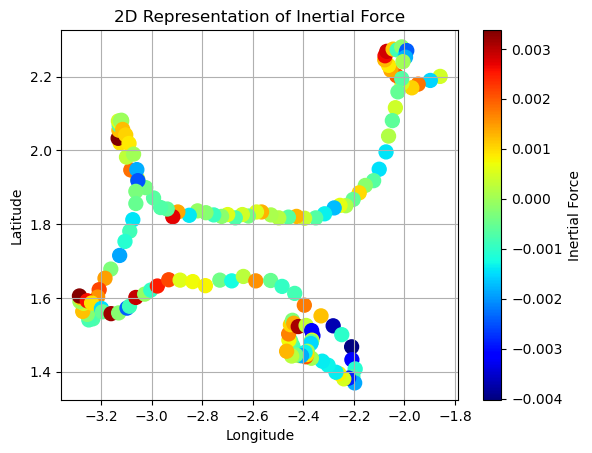

In [20]:
# Creating an example dataframe
df_1 = df[16129:16290]

# Convert the time column to a numerical format representing elapsed time (in seconds)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Calculating acceleration
df_1['acceleration'] = df_1['ve'].diff() / df_1['time'].diff()

# Mass (as an example)
mass = 1000  # in kg

# Calculating inertial force
df_1['inertial_force'] = mass * df_1['acceleration']

# Plotting the inertial force in 2D
plt.scatter(df_1['longitude'], df_1['latitude'], c=df_1['inertial_force'], cmap='jet', s=100)
plt.colorbar(label='Inertial Force')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Representation of Inertial Force')
plt.grid(True)
plt.savefig("fig19 mode.png")
plt.show()

#  Case of vn

C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\2869538165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\2869538165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['acceleration'] = df_1['vn'].diff() / df_1['time'].diff()
C:\Users\PC-M2OA\AppData\Local\Temp\ipykernel_3304\2869538165.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

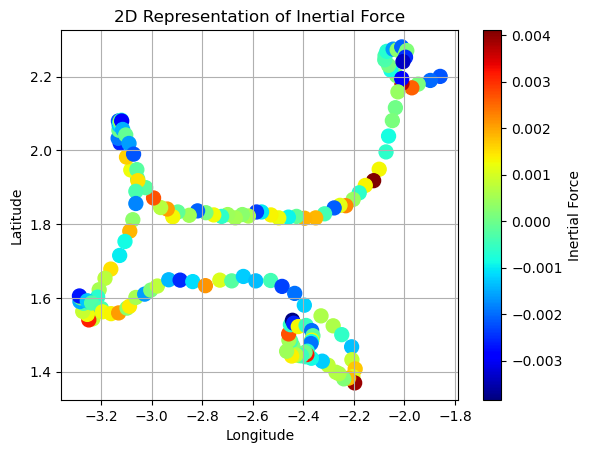

In [21]:
# Creating an example dataframe
df_1 = df[16129:16290]

# Convert the time column to a numerical format representing elapsed time (in seconds)
df_1['time'] = (df_1['time'] - df_1['time'].iloc[0]).dt.total_seconds()

# Calculating acceleration
df_1['acceleration'] = df_1['vn'].diff() / df_1['time'].diff()

# Mass (as an example)
mass = 1000  # in kg

# Calculating inertial force
df_1['inertial_force'] = mass * df_1['acceleration']

# Plotting the inertial force in 2D
plt.scatter(df_1['longitude'], df_1['latitude'], c=df_1['inertial_force'], cmap='jet', s=100)
plt.colorbar(label='Inertial Force')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('2D Representation of Inertial Force')
plt.grid(True)
plt.savefig("fig20 mode.png")
plt.show()

# Conclusion
 - $v_e$ and $v_n$ exhibit inertial oscillations.
 - Note that such oscillations are generally caused by wind fluctuations. This will be the subject of our next notebook.